<a href="https://colab.research.google.com/github/safa1231/Machine-learning-/blob/main/Semantic_Recommendation_Engine_Book_Movie_Suggestions_from_Descriptions_Using_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the book descriptions

In this step, We will be :
1.   Loading the books.csv file.

2.   Keeping only the columns we need: title, authors, and description

3.   Cleaning the descriptions (lowercase, remove punctuation, stopwords, etc.).






.




In [15]:
 #Load dataset
from google.colab import files
uploaded=files.upload()
data = pd.read_csv('Book_Details.csv', sep=',', on_bad_lines='skip') # skips the problematic lines
# Display the first few rows
print(data.head())
print(data.info())

Saving Book_Details.csv to Book_Details.csv
   Unnamed: 0  book_id                                    cover_image_uri  \
0           0        1  https://images-na.ssl-images-amazon.com/images...   
1           1        2  https://images-na.ssl-images-amazon.com/images...   
2           2        3  https://images-na.ssl-images-amazon.com/images...   
3           3        5  https://images-na.ssl-images-amazon.com/images...   
4           4        6  https://images-na.ssl-images-amazon.com/images...   

                                  book_title  \
0     Harry Potter and the Half-Blood Prince   
1  Harry Potter and the Order of the Phoenix   
2      Harry Potter and the Sorcerer's Stone   
3   Harry Potter and the Prisoner of Azkaban   
4        Harry Potter and the Goblet of Fire   

                                        book_details  \
0  It is the middle of the summer, but there is a...   
1  Harry Potter is about to start his fifth year ...   
2  Harry Potter has no idea how famo

In [21]:
#drop unncessary columns
books = data[['book_id', 'book_title', 'author', 'book_details','genres']].dropna()
books = books.reset_index(drop=True)
print(books.head())



   book_id                                 book_title        author  \
0        1     Harry Potter and the Half-Blood Prince  J.K. Rowling   
1        2  Harry Potter and the Order of the Phoenix  J.K. Rowling   
2        3      Harry Potter and the Sorcerer's Stone  J.K. Rowling   
3        5   Harry Potter and the Prisoner of Azkaban  J.K. Rowling   
4        6        Harry Potter and the Goblet of Fire  J.K. Rowling   

                                        book_details  \
0  It is the middle of the summer, but there is a...   
1  Harry Potter is about to start his fifth year ...   
2  Harry Potter has no idea how famous he is. Tha...   
3  Harry Potter, along with his best friends, Ron...   
4  It is the summer holidays and soon Harry Potte...   

                                              genres  
0  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...  
1  ['Young Adult', 'Fiction', 'Magic', 'Childrens...  
2  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...  
3  ['Fantasy', '

In [23]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [27]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply to all book descriptions
books['clean_description'] = books['book_details'].apply(clean_text)
print (books.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   book_id                                 book_title        author  \
0        1     Harry Potter and the Half-Blood Prince  J.K. Rowling   
1        2  Harry Potter and the Order of the Phoenix  J.K. Rowling   
2        3      Harry Potter and the Sorcerer's Stone  J.K. Rowling   
3        5   Harry Potter and the Prisoner of Azkaban  J.K. Rowling   
4        6        Harry Potter and the Goblet of Fire  J.K. Rowling   

                                        book_details  \
0  It is the middle of the summer, but there is a...   
1  Harry Potter is about to start his fifth year ...   
2  Harry Potter has no idea how famous he is. Tha...   
3  Harry Potter, along with his best friends, Ron...   
4  It is the summer holidays and soon Harry Potte...   

                                              genres  \
0  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   
1  ['Young Adult', 'Fiction', 'Magic', 'Childrens...   
2  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...   
3  ['Fantasy

# Vectorize the Descriptions

In [32]:
#Building only the vocab needed in our database
vocab = set()
for desc in books['clean_description']:
    vocab.update(desc.split())

print(f"Unique words in vocab: {len(vocab)}")


Unique words in vocab: 142242


In [33]:
from google.colab import files
uploaded = files.upload()  # Choose glove.6B.100d.txt manually
glove_path = 'glove.6B.100d.txt'

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [38]:
embedding_dict = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        if word in vocab:
            vector = np.array(values[1:], dtype='float32')
            embedding_dict[word] = vector

print(f"Loaded {len(embedding_dict)} vectors out of {len(vocab)} vocabulary words.")
# Create vector representation for each book
def get_average_vector(text, embedding_dict, dim=100):
    words = text.split()
    valid_vectors = [embedding_dict[word] for word in words if word in embedding_dict]
    if not valid_vectors:
        return np.zeros(dim)
    return np.mean(valid_vectors, axis=0)

books['glove_vector'] = books['clean_description'].apply(lambda x: get_average_vector(x, embedding_dict))





Loaded 57539 vectors out of 142242 vocabulary words.


# Build the Recommendation System

In [44]:
#import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# Stack all vectors into a matrix
book_vectors = np.stack(books['glove_vector'].values)
# Compute cosine similarity between all books
similarity_matrix = cosine_similarity(book_vectors)
print (similarity_matrix)



[[1.         0.94667826 0.91713828 ... 0.82557337 0.86581513 0.8906424 ]
 [0.94667826 1.         0.93180022 ... 0.84707709 0.88649208 0.91851842]
 [0.91713828 0.93180022 1.         ... 0.845371   0.88957206 0.88981876]
 ...
 [0.82557337 0.84707709 0.845371   ... 1.         0.86178448 0.88005324]
 [0.86581513 0.88649208 0.88957206 ... 0.86178448 1.         0.94428109]
 [0.8906424  0.91851842 0.88981876 ... 0.88005324 0.94428109 1.        ]]


In [45]:
#recommendation function
def recommend_books(title, books_df, similarity_matrix, top_n=5):
    # Find the index of the book by title
    idx = books_df[books_df['book_title'].str.lower() == title.lower()].index
    if idx.empty:
        return "Book not found."

    idx = idx[0]

    # Get similarity scores for that book
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort and get top N most similar (excluding the book itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Return the titles of the most similar books
    recommended = books_df.iloc[[i[0] for i in sim_scores]]
    return recommended[['book_title', 'author', 'book_details']]


Trying to recommend books based on preferred book

In [46]:
recommend_books("Harry Potter and the Sorcerer's Stone", books, similarity_matrix)


,book_title,author,book_details
9433,The Magicians and Mrs. Quent,Galen Beckett,"In this enchanting debut novel, Galen Beckett ..."
9411,James Potter and the Hall of Elders' Crossing,G. Norman Lippert,What’s it like to be the son of the most famou...
11518,Dead Beautiful,Yvonne Woon,"On the morning of her sixteenth birthday, René..."
6798,Old Magic,Marianne Curley,When Kate first sees Jarrod she senses that he...
4293,Charlie Bone and the Invisible Boy,Jenny Nimmo,The third book in the Children of the Red King...


Based on the reader's preference for "Harry Potter and the Sorcerer's Stone" , We would recommend the top 5 similar books:

1.   The Magicians and Mrs. Quent

1.   James Potter and the Hall of Elders' Crossing

1.   Dead  beautiful
2.   Old Magic

2.   Charlie Bone and the invisible boy


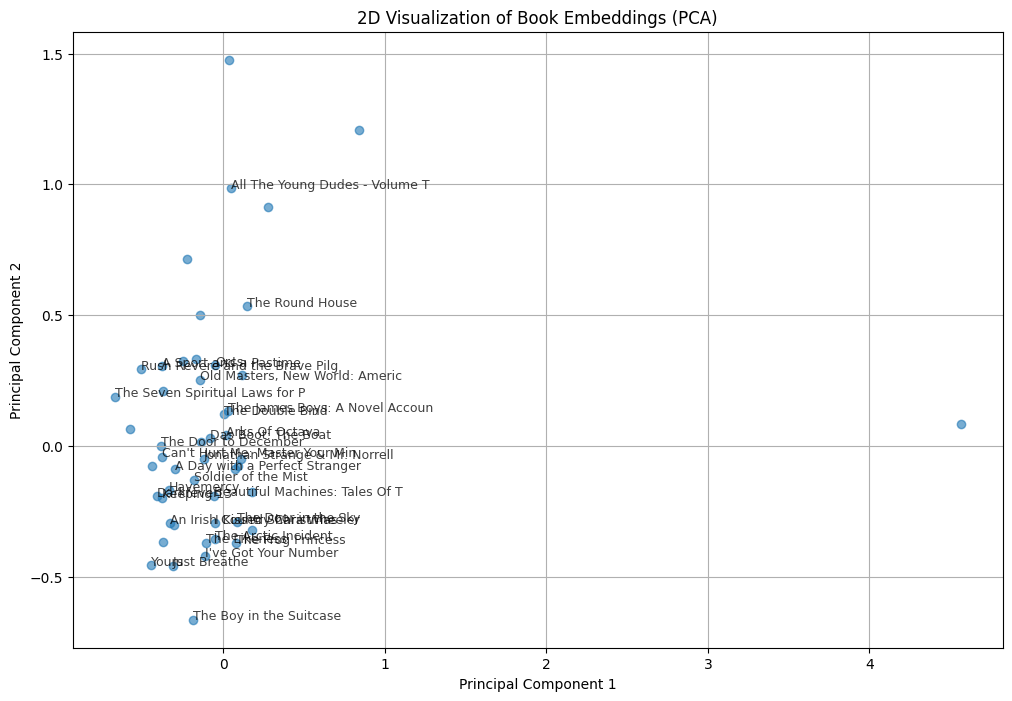

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the 100D glove vectors to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(np.stack(books['glove_vector'].values))

# Plot a sample of books
sample_size = 50
sample_indices = np.random.choice(len(books), size=sample_size, replace=False)

plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[sample_indices, 0], vectors_2d[sample_indices, 1], alpha=0.6)

# Annotate a few points
for i in sample_indices[:30]:  # Only label a few to keep it clean
    plt.annotate(books.iloc[i]['book_title'][:30],
                 (vectors_2d[i, 0], vectors_2d[i, 1]),
                 fontsize=9, alpha=0.75)

plt.title("2D Visualization of Book Embeddings (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


-Books with similar themes or descriptions appear closer together

-Outliers or unique books will stand out

